<a href="https://colab.research.google.com/github/Timli935/Projects/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Group Contributions Statement

“All three of us wrote the descriptions and conclusion for our analyses. Tim created the histogram and random forest model. Yuheng created the scatter plot and the Gaussian Naive Bayes model. Cassidy created the barplot and the logistic regression model. Tim and Yuheng wrote the code for cleaning data, and Cassidy the conclusion. All three of us added various elements to our plotting methods to ensure full accuracy. We all checked each other’s work and made revisions to code and writing in discussion section.”

# Data import and cleaning
The data is imported from the online CSV file, which is then cleaned by removing unnecessary columns, shortening the column names, and shortening Specie names for simplicity. The data used for analysis is not distorted.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#imports the data and display the data format
url = 'https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv'
penguins = pd.read_csv(url)
penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [ ]:
# Do some adjustment to our dataframe in order to easily perform the code,
#not an actual data cleaning here

#separate out the necessery regions

penguins = penguins[['Species', 'Region', 'Island','Culmen Length (mm)',
                     'Culmen Depth (mm)', 'Flipper Length (mm)','Body Mass (g)',
                     'Sex','Delta 15 N (o/oo)','Delta 13 C (o/oo)']]
#simplify the specie names
penguins["Species"] = penguins["Species"].str.split().str.get(0)
#simplify the column names
penguins = penguins.rename(columns={'Culmen Length (mm)': 'Culmen Len',
                                    'Culmen Depth (mm)': 'Culmen Dep',
                                   'Flipper Length (mm)': 'Flipper Len',
                                    'Body Mass (g)': 'Mass',
                                   'Delta 15 N (o/oo)': 'Delta 15',
                                    'Delta 13 C (o/oo)': 'Delta 13'})
#simplify the sex and reassign to the original column
record = {
    "MALE" : "M",
    "FEMALE" : "F"
}
penguins["Sex"] = penguins["Sex"].map(record)
penguins.head()

<ipython-input-2-9ff5daae731b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins["Species"] = penguins["Species"].str.split().str.get(0)


,Species,Region,Island,Culmen Len,Culmen Dep,Flipper Len,Mass,Sex,Delta 15,Delta 13
0,Adelie,Anvers,Torgersen,39.1,18.7,181.0,3750.0,M,NaN,NaN
1,Adelie,Anvers,Torgersen,39.5,17.4,186.0,3800.0,F,8.94956,-24.69454
2,Adelie,Anvers,Torgersen,40.3,18.0,195.0,3250.0,F,8.36821,-25.33302
3,Adelie,Anvers,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Anvers,Torgersen,36.7,19.3,193.0,3450.0,F,8.76651,-25.32426


In [ ]:
from sklearn.model_selection import train_test_split
# we split the data into a training set and a test set, 30% of the data is in the test set
np.random.seed(1234)
train, test = train_test_split(penguins, test_size = 0.3)

train.shape, test.shape

((240, 10), (104, 10))

Now we can define a function to clean our training and test set

Since we are supposed to perform the data cleaning twice, once on the test set and once on the training set, we can define a data_clean function to clean the data twice.

In [ ]:
from sklearn import preprocessing

def data_clean(df_data):
    """
    Cleans the input data by encoding the various qualatitative names into
    numbers
    Drop the target column: Species
    Sets the training columns as the other columns
    """
    df = df_data

    le = preprocessing.LabelEncoder()

    df["Species"] = le.fit_transform(df["Species"])
    df["Sex"] = le.fit_transform(df["Sex"])
    df["Region"] = le.fit_transform(df["Region"])
    df["Island"] = le.fit_transform(df["Island"])

     # Then we have to drop the nan value
    df = df.dropna()

    #assign the test and target data
    X = df.drop(["Species"], axis = 1)
    y = df["Species"]

    return(X,y)

Now we have defined a data_clean function as described. We can perform the data cleaning twice for the training and test set sperately.

In [ ]:
X_train, y_train = data_clean(train)
X_test, y_test = data_clean(test)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((229, 9), (229,), (101, 9), (101,))

## Exploratory Analysis
We want to create a Scatter plot, a histgram and a barplot to do the exlortaory Analysis. Specifically, we want to find the relationship between the Species, Island, Culmen Len, Culmen Dep, and Mass.

### Summary Table

In [ ]:
#Exploratory Analysis
def penguin_summary_table(group_cols, value_cols):
    """
    Creates a summary table using the groupby function according to
    input columns
    """
    summary_table = penguins.groupby(group_cols)[value_cols].mean().round(2)
    return summary_table

penguin_summary_table(["Island", "Species", "Sex"], ["Culmen Len", "Culmen Dep","Mass"])

Culmen Len  Culmen Dep     Mass
Island    Species   Sex                                 
Biscoe    Adelie    F         37.36       17.70  3369.32
                    M         40.59       19.04  4050.00
          Gentoo    F         45.56       14.24  4679.74
                    M         49.47       15.72  5484.84
Dream     Adelie    F         36.91       17.62  3344.44
                    M         40.07       18.84  4045.54
          Chinstrap F         46.57       17.59  3527.21
                    M         51.09       19.25  3938.97
Torgersen Adelie    F         37.55       17.55  3395.83
                    M         40.59       19.39  4034.78

According to the summary table, Island can be a key feature that distinguish the species as different island has distinct combination of species. For example, Adelie is only found on Torgersen. In addition, there appears to have a significant difference between the mass of various species. The culmen depth for Gentoo is notably lower than other two species, while the culmen length for Adelie is notably lower than the other two speies. Therefore, when performing the modeling analysis, we would specifically test the cross validation scores of different combinations features that includes Island, Culmen length and Culmen depth.

### Scatter Plot

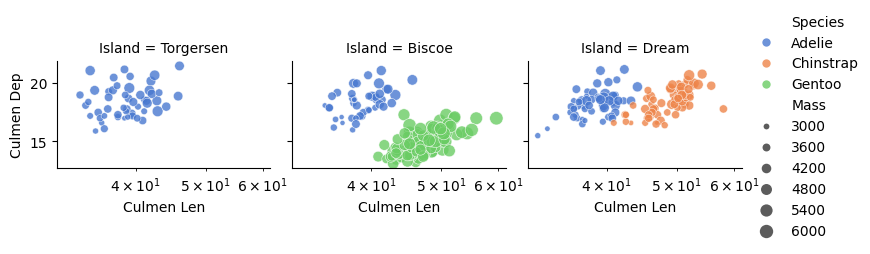

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# create a weighted scatter plot of the distribution of various species by mass
# and island
fgrid = sns.relplot(x = "Culmen Len", y = "Culmen Dep", hue = "Species", size = "Mass",
            col = "Island", alpha = .8, sizes=(10, 100), palette = "muted",
            height = 2, aspect = 1.3, data = penguins)

fgrid.axes[0][0].semilogx();

The scatter plots illustrate distinct clusters of penguin characteristics across Torgersen, Biscoe, and Dream islands. It's apparent that Adelie penguins inhabit all three islands, whereas Chinstrap and Gentoo penguins have a more limited distribution, suggesting that island habitat may not be a reliable predictor for species classification.

Observations indicate that both culmen length and depth are critical variables for species identification. Adelie penguins exhibit shorter culmen lengths but longer culmen depths compared to Gentoos, which display the opposite trend. These attributes—culmen length and depth—appear to be potent predictors for determining penguin species.

Additionally, body mass exhibits significant variance, especially between the Gentoo species and others, as evidenced by the data points' size. This distinction in mass suggests that body weight is another valuable feature for our predictive model. Using these insights, we can refine our feature selection to enhance model performance.

### Hist Plot

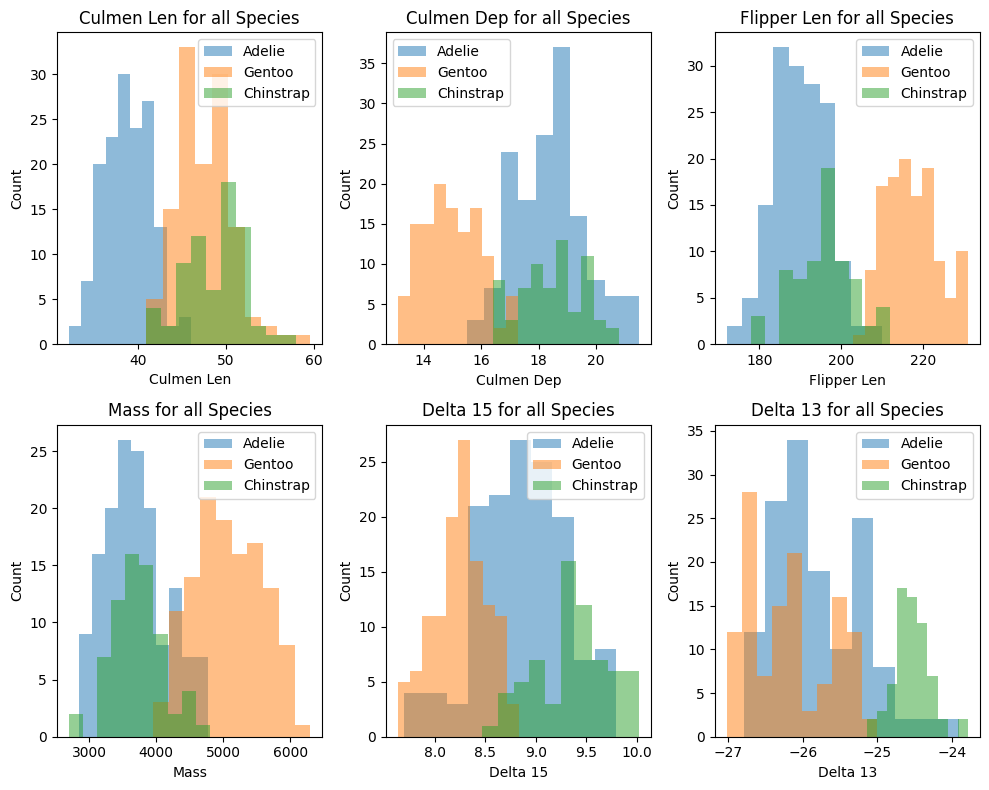

In [ ]:
def multihist(penguins, Species, categories, alpha):
    """
    plots a matrix of histograms that illustrate the distribution of various
    features by species
    outputs histograms based on input columns
    """
    #create a matrix plot of dimension 2 x 3
    fig, axs = plt.subplots(2,3, figsize=(10,8))
    axs = axs.flatten()
    #for each features in the cateogry, separate the data by species and plot
    for i, category in enumerate(categories):
        for specie in Species:
            subspecies = penguins[penguins['Species'] == specie]
            axs[i].hist(subspecies[category], alpha=alpha, label=specie)
        #add plot lables for each histogram
        axs[i].set_title(f"{category} for all Species")
        axs[i].set_xlabel(category)
        axs[i].set_ylabel('Count')
        axs[i].legend()

    plt.tight_layout()
    plt.show()
#execute the function and plot key features
multihist(penguins,["Adelie","Gentoo","Chinstrap"],
             ["Culmen Len","Culmen Dep","Flipper Len","Mass","Delta 15","Delta 13"],alpha = 0.5)

According to the histograms separated by species, there is little overlap for the distribution of culmen length for Adelie vs Gentoo and Chinstrap, which is consistent with the summary table obseration of the mean values above. In addition, there is also little overlap for culmen depth and flipper length for Gentoo. The mass distritbtion for Gentoo is also significantly higher than other species. These will be used and tested for cross validation scores in feature selection.

### Barplot

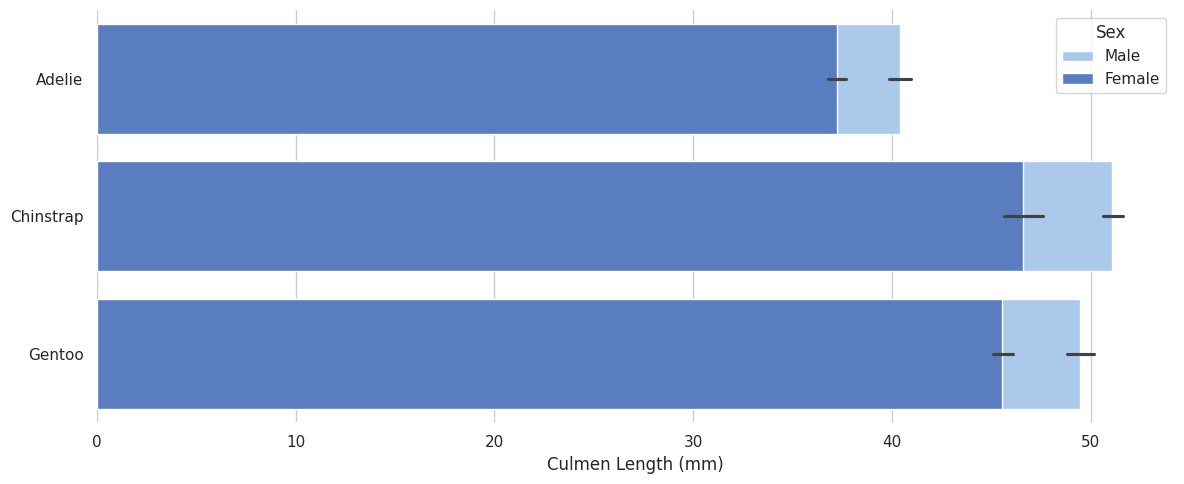

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
"""
plots a barplot that illustrate the distribution of various
features by sex and species by culment length
"""
# Set color themes
sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")

# Set and initialize matplotlib size
fig, ax = plt.subplots(figsize=(12, 5))

# Plot the culmen length for males
sns.set_color_codes("pastel")
sns.barplot(x="Culmen Len", y="Species", data=penguins[penguins['Sex'] == 'M'],
            label="Male", color="b", orient='h')

# Plot the culmen length for females
sns.set_color_codes("muted")
sns.barplot(x="Culmen Len", y="Species", data=penguins[penguins['Sex'] == 'F'],
            label="Female", color="b", orient='h')

# Add legend and axis labels
ax.legend(title="Sex")
ax.set(ylabel="", xlabel="Culmen Length (mm)")
sns.despine(left=True, bottom=True)

# adjust fit and display
plt.tight_layout()
plt.show()

According to the barplot above, there seems to be a slight disparity between male and female culmen lengths, which also varry by species. Female penguins have a noteably lower culmen length than their male counterpart in each species. Chinstrap penguins have the longest culmen, when Gentoo falling slightly under them, and Adelie as the shortest culment lengths for both male and female.

This figure, especially referencing the difference in males and females, will be referenced as we discuss the strongest predictors in feature selection. There are notable categorizations in all aspects of this plot.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

## Feature Selection

### Approach Overview
Our feature selection methodology leverages automated techniques. This approach allows us to select approriate feature between different model performance.

We aim to develop a feature selection function to identify the optimal feature for our model, employing the K-fold Cross Validation method to guide our choice.




Given the nature of our data—comprising two quantitative and one qualitative variable—Gaussian Naive Bayes emerges as the most fitting choice, promising the highest accuracy for our classification needs.

Also we used the same function to test the RandomForest Classifier and LogisticRegression Classifier.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

def check_model_score(cols, model_type='gnb'):
    """
    Trains and evaluates a model via cross-validation on the columns in cols and returns the CV score.
    Allows for the use of Logistic Regression, Random Forest, and Gaussian Naive Bayes classifiers.

    Parameters:
    - cols: List of columns to train the model on.
    - model_type: Type of model to train. Options are 'gnb' for Gaussian Naive Bayes,
      'lr' for Logistic Regression, and 'rf' for Random Forest.
    """
    print("Training with columns " + str(cols))

    # Instantiate the model based on model_type
    if model_type == 'gnb':
        model = GaussianNB(var_smoothing=1e-4)
    elif model_type == 'lr':
        model = LogisticRegression(max_iter=1000)
    elif model_type == 'rf':
        model = RandomForestClassifier(n_estimators=100)
    else:
        raise ValueError("Unsupported model type. Choose 'gnb', 'lr', or 'rf'.")

    # Train the model and calculate the cross-validation score
    cv_score = cross_val_score(model, X_train[cols], y_train, cv=5).mean()
    return cv_score

# Example usage:
combos = [["Region","Culmen Len","Flipper Len"],
          ["Island","Culmen Len","Flipper Len"],
          ["Sex","Culmen Len","Delta 15"],
          ["Sex","Culmen Len","Flipper Len"]]

# Specify the model types you want to use
model_types = ['gnb', 'lr', 'rf']

for model_type in model_types:
    print(f"Model Type: {model_type.upper()}")
    for cols in combos:
        x = check_model_score(cols, model_type)
        print("CV score is " + str(x))
    print("\n")

Model Type: GNB
Training with columns ['Region', 'Culmen Len', 'Flipper Len']
CV score is 0.9652173913043478
Training with columns ['Island', 'Culmen Len', 'Flipper Len']
CV score is 0.9869565217391305
Training with columns ['Sex', 'Culmen Len', 'Delta 15']
CV score is 0.9476328502415459
Training with columns ['Sex', 'Culmen Len', 'Flipper Len']
CV score is 0.9652173913043478


Model Type: LR
Training with columns ['Region', 'Culmen Len', 'Flipper Len']
CV score is 0.9565217391304348
Training with columns ['Island', 'Culmen Len', 'Flipper Len']
CV score is 0.9608695652173914
Training with columns ['Sex', 'Culmen Len', 'Delta 15']
CV score is 0.9607729468599034
Training with columns ['Sex', 'Culmen Len', 'Flipper Len']
CV score is 0.9565217391304348


Model Type: RF
Training with columns ['Region', 'Culmen Len', 'Flipper Len']
CV score is 0.9565217391304348
Training with columns ['Island', 'Culmen Len', 'Flipper Len']
CV score is 0.9782608695652174
Training with columns ['Sex', 'Culmen 

We defined a feature selection function to help us automatically select the appropriate features from the column combos, which is more reasonable for us instead of simply using the characteristics we obeserbed from explotrart analysis. This is because we need to implement the actual model to see if a moedel works well.
After employing cross-validation to assess each combination of features, it was observed that the set ["Island", "Culmen Len", "Flipper Len"] yielded the highest accuracy for the training data with GNB and RF classifier. However ['Sex', 'Culmen Len', 'Culmen Dep'] is the best for LR classifer.

For Models 2 and 3, we apply the same methodological framework. We adjust feature combinations based on the model's specific context and the characteristics of the data it handles.


To further refine the model, an iterative loop could be implemented to fine-tune parameters and enhance predictive performance.


## Functions for making Decision Region

In [ ]:
###Decision Region
def plot_regions(c, X, y, col_x, col_y, title):
    """
    This function creates a decision region plot according to the input models
    Output is a series of decision region plots separarted by the qualatitative
    variable
    """
    # for convenience, give names to the two
    # columns of the data
    x0 = X[col_x]
    x1 = X[col_y]

    # create a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)

    XX = xx.ravel()
    YY = yy.ravel()
    XY = pd.DataFrame({
        col_x : XX,
        col_y  : YY
    })

    p = c.predict(XY)
    p = p.reshape(xx.shape)

    # create the plot
    fig, ax = plt.subplots(1)

    # use contour plot to visualize the predictions
    contour_set = ax.contourf(xx, yy, p, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)

    # plot the data
    scatter = ax.scatter(x0, x1, c = y, cmap = "jet", vmin = 0, vmax = 2)

    ax.set(xlabel = col_x,
           ylabel = col_y,
           title = title)
    #lable the scatter plot with dots separarted by species
    label_dict = {0: "Adelie", 1: "Chinstrap", 2: "Gentoo"}
    unique_y = np.unique(y)
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(s), linestyle='None')
                for s in [scatter.norm(value) for value in unique_y]]
    new_labels = [label_dict[value] for value in unique_y]
    #add legend according to the labels created above
    ax.legend(handles, new_labels, title="Species")

In [ ]:
def plot_multi_region(c, X, y, col_x, col_y, qualatitative_category, qualatitative_list):

    for i in range(len(qualatitative_list)):
        X_subisland = X[X[qualatitative_category] == i]
        y_subisland = y[X[qualatitative_category] == i]

        x0 = X_subisland[[col_x,col_y]]
        y0 = y_subisland
        c.fit(x0,y0)
        plot_regions(c, x0, y0, col_x, col_y, qualatitative_list[i])

## Modelling

### Random Forest



In [ ]:
def check_forest_score(cols, X, y, max_depth):
    """
    Evaluates the possible feastures using cross-validation
    """
    print("Training with columns " + str(cols) + " and depth " + str(max_depth))

    RF = RandomForestClassifier(max_depth = max_depth)
    return cross_val_score(RF, X[cols], y, cv = 5).mean()

In [ ]:
#Random forest modeling
#using the features chosen from feature selection, the features:
#Island, Culmen Len, Flipper Len are chosen for the modeling
cols_forest = ['Island', 'Culmen Len', 'Flipper Len']
X_train_ = X_train[cols_forest]
X_test_ = X_test[cols_forest]

#perform cross validation tests to check the optimial depth
RF = RandomForestClassifier()

#iterate through various depth with chosen features
max_depth_test = 10
for i in range(1,max_depth_test):
    RF = RandomForestClassifier(max_depth = i)
    print("Score for depth " + str(i) + " :"+ str(cross_val_score(RF,
    X_train[["Island","Culmen Len","Flipper Len"]], y_train, cv = 5).mean()))
#the optimal depth is 5 as shown by the loop

Score for depth 1 :0.7903381642512077
Score for depth 2 :0.9652173913043478
Score for depth 3 :0.9739130434782609
Score for depth 4 :0.9739130434782609
Score for depth 5 :0.9782608695652174
Score for depth 6 :0.9739130434782609
Score for depth 7 :0.9739130434782609
Score for depth 8 :0.9782608695652174
Score for depth 9 :0.9782608695652174


Using the selected features chosen from feature selection, the function recalculates the cross validation scores for various depth to find the optimal depth for the model. According to the iterations above, the optimal depth is reached at 5. For iterations after 5, the score stays similar with little to no improvements.

In [ ]:
#performs random forest modeling with max depth of 5
RF = RandomForestClassifier(max_depth = 5)
RF.fit(X_train,y_train)
RF.score(X_test,y_test)

0.9801980198019802

Random Forest test is done on the training data and the model is used to score the testing data. The model is able to achieve around 98% accuracy.

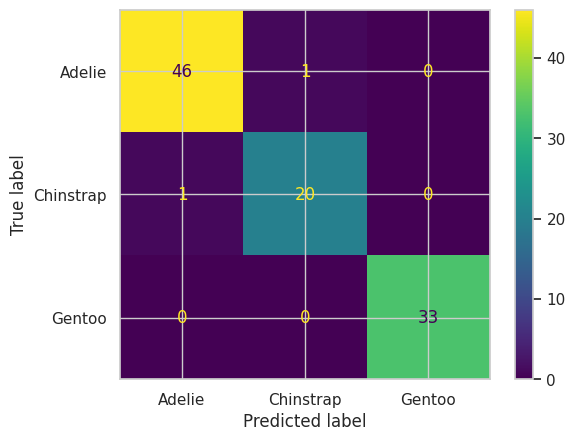

In [ ]:
#constructing confusion matrix
from sklearn import metrics
y_test_predicted = RF.predict(X_test)

def confusion_matrix(true_data, predicted_data):
    """
    Constructs a confusion matrix which compares the predications with the
    actual data
    Plots the matrix according to input true vs predicted data
    """
    confusion_matrix = metrics.confusion_matrix(true_data, predicted_data)

    #display the data by species in a 3x3 matrix
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                                display_labels = ["Adelie","Chinstrap","Gentoo"])
    #plots the data
    cm_display.plot()
    plt.show()

confusion_matrix(y_test, y_test_predicted)

There is slight errors caused by the unseen data. According to the confusion matrix displayed above, there is confusion between the labeling of Chinstrap vs Adelie. This might be becuase Adelie is found on all 3 islands, while there is overlap between the Culmen Len and Flipper Len and Adelie vs Chinstrap. Nevertheless, the model is able to achieve 98% accuracy (accuracy may fluctuate if the model reruns) on the unseen testing data with little error.

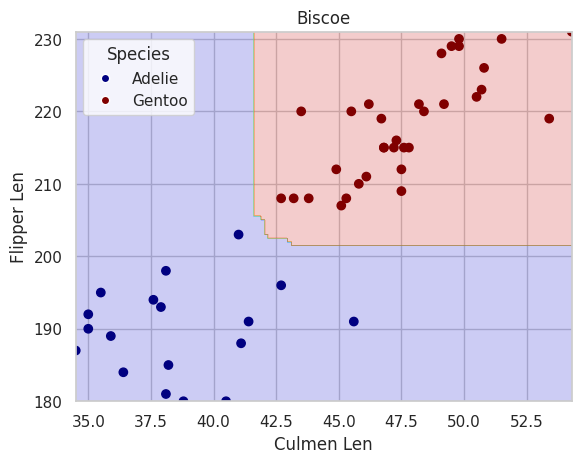

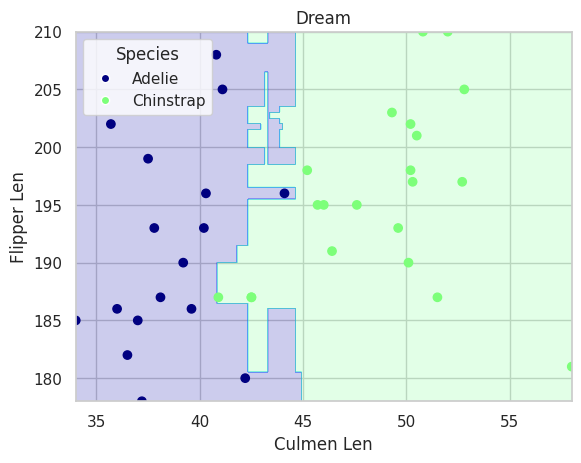

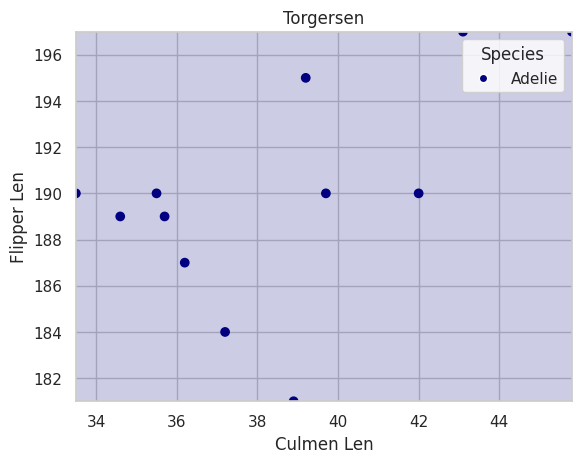

In [ ]:
plot_multi_region(RF, X_test, y_test, "Culmen Len", "Flipper Len",
                  "Island",['Biscoe', 'Dream', 'Torgersen'])

According to the decision regions, the model is able to capture the species correctly through the decision regions chosen. Nevertheless, the overlap in the distribution of Culmen Length for Adelie and Chinstrap on the island "Dream" may cause error in the predictions.

#### Naive Bayes


Upon evaluating several models, I chose the Naive Bayes classifier for its superior precision over both support vector machines and neural networks. It's important to note that the "scikit-learn" package offers four distinct Naive Bayes classifiers:

**Gaussian Naive Bayes**: Ideal for continuous data.

**Multinomial Naive Bayes**: Best suited for textual data, handling discrete counts (e.g., 0, 1, 2, ...).

**Bernoulli Naive Bayes**: Optimal for binary data, such as boolean variables or categorical data with two categories.

**Complement Naive Bayes**: Specifically designed for imbalanced datasets.


We can first define a for loop to check which parameter is the best for our GaussianNB classifier.

Cross-validation to choose complexity parameters:

In [ ]:
for i in range(1,9):
    var_smoothing_value = 10 ** -i
    gnb = GaussianNB(var_smoothing= var_smoothing_value)

    # using corss_val_score to choose which parameter is the best for our model.
    print("Score for parameter 1e-" + str(i) + " :"+ str(cross_val_score(gnb, X_train[["Island","Culmen Len","Flipper Len"]], y_train, cv = 5).mean()))

Score for parameter 1e-1 :0.9214492753623189
Score for parameter 1e-2 :0.9652173913043478
Score for parameter 1e-3 :0.9782608695652174
Score for parameter 1e-4 :0.9869565217391305
Score for parameter 1e-5 :0.9825120772946858
Score for parameter 1e-6 :0.9694685990338165
Score for parameter 1e-7 :0.9518840579710146
Score for parameter 1e-8 :0.9256038647342996


It looks like when the parameter takes var_smoothing = 1e-4, we will achieve the most accurate score for our training data.

We will use it see if our test score is still high enough for our prediction

In [ ]:
## Assign train value to our specific column
X_train = X_train[["Island","Culmen Len","Flipper Len"]]

## Assign test value to our specific column
X_test = X_test[["Island","Culmen Len","Flipper Len"]]

# check the prediction score
gnb = GaussianNB(var_smoothing=1e-4)
gnb.fit(X_train, y_train)
print("Score for X_test " + str(gnb.score(X_test, y_test)))

Score for X_test 0.9504950495049505


We achieved a 0.95 accuracy, which awesome! we can create a confusion matrix to see how we did now!

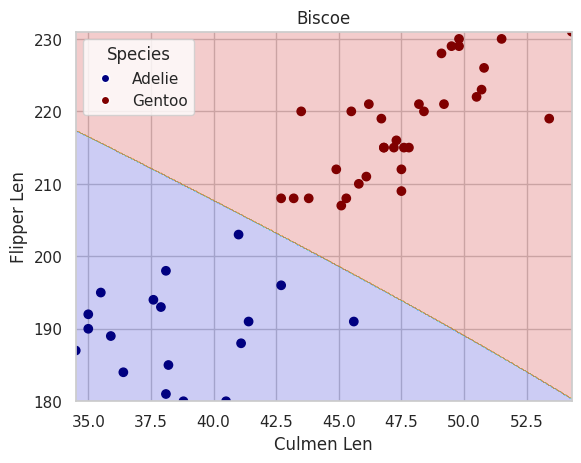

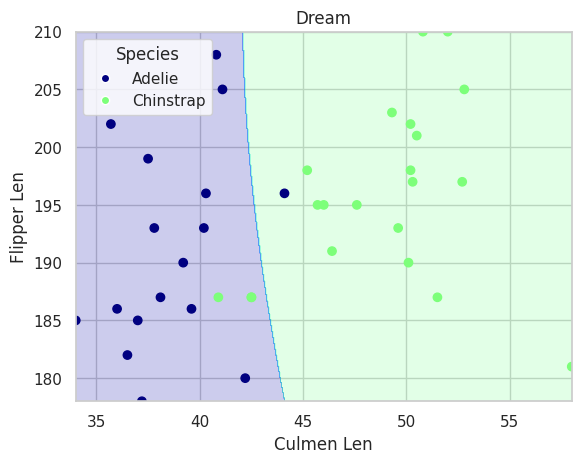

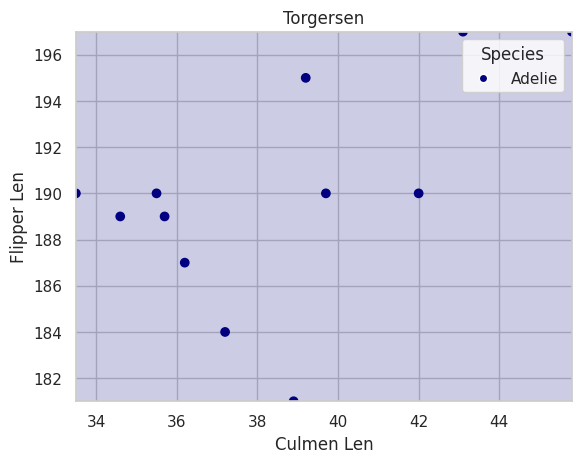

In [ ]:
gnb = GaussianNB(var_smoothing=1e-4)
plot_multi_region(gnb, X_test, y_test, "Culmen Len", "Flipper Len",
                  "Island",['Biscoe', 'Dream', 'Torgersen'])

# Logistic Regression


I chose to use logistic regression as my model due to the large data set without finite features which predit a certain species.

In [ ]:
# Reset cols to access sex and culmen dep
X_train, y_train = data_clean(train)
X_test, y_test = data_clean(test)

## Assign train value to our specific column
X_train = X_train[["Sex","Culmen Len","Culmen Dep"]]

## Assign test value to our specific column
X_test = X_test[["Sex","Culmen Len","Culmen Dep"]]

# Check prediction score
LR = LogisticRegression(max_iter = 2000)
LR.fit(X_train, y_train)
print("Score for X_test " + str(LR.score(X_test, y_test)))

Score for X_test 0.9801980198019802


We achieved .98 with a logisitc regression model which is highly accurate, proving that the features chosen are very intuitive predictors of species. Now, lets inspect our confusion matrix with the previously defined function "confusion_matrix()".


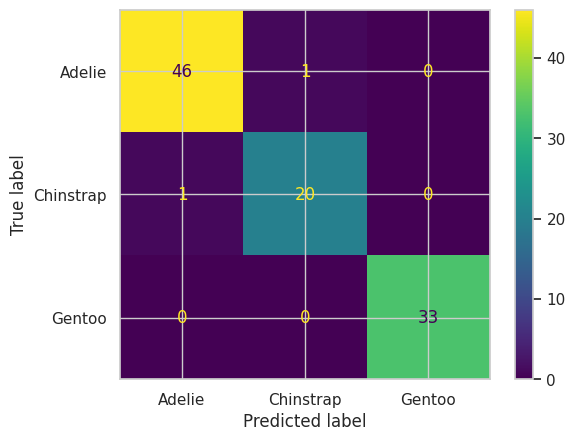

In [ ]:
y_test_predicted = LR.predict(X_test)

confusion_matrix(y_test, y_test_predicted)

Great! Now it's time to create a decision region to make sure our model is not a culprit of overfitting and so we can see how each species is distrubuted through the plot.

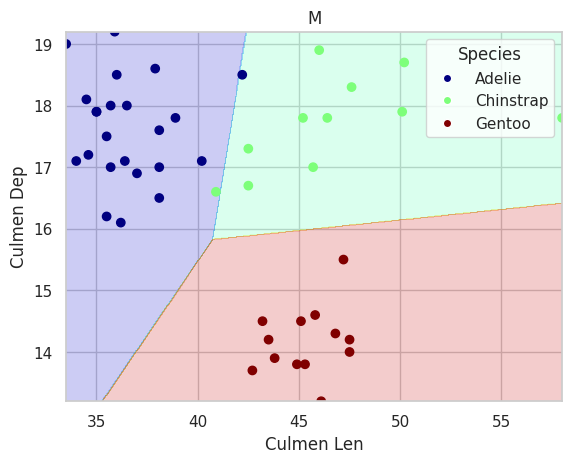

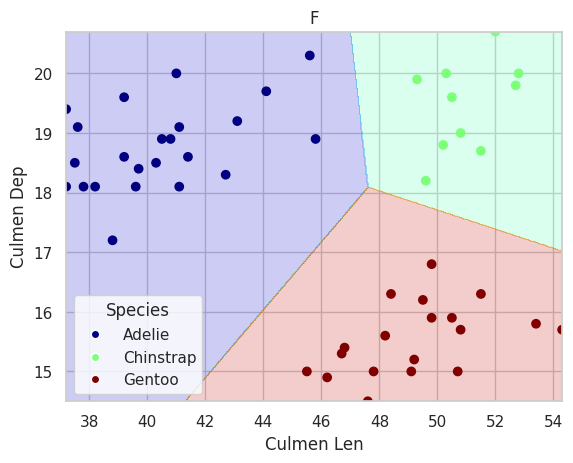

In [ ]:
LR = LogisticRegression(max_iter = 2000)
plot_multi_region(LR, X_test, y_test, "Culmen Len", "Culmen Dep",
                  "Sex",['M', 'F'])

## Discussion


After evaluating three different machine learning models on the penguin dataset, we have observed consistently high performance across all methods. Yuheng's Gaussian Naive Bayes model achieved an accuracy score of .95, Tim's Random Forest model scored .98, while Cassidy's Logistic Regression model also achieved an accuracy score of .98. These results indicate that each of these models is capable of effectively predicting a penguin's species based on the provided features.

In addition to the overall performance metrics, it is important to consider the specific characteristics of each model. Yuheng's Gaussian Naive Bayes model, leveraging its simplicity and probabilistic nature, demonstrated strong predictive power with a scatter figure indicating a clear delineation between species. Tim's Random Forest model showcased excellent performance with a histogram figure, suggesting robustness in handling complex interactions among features. On the other hand, Cassidy's Logistic Regression model, illustrated by a bar chart, provided insight into the importance of individual features in predicting species classification.

Considering the initial goal of identifying highly predictive measurements for penguin species classification, our findings highlight several potential key features. While the provided measurements such as culmen length and depth, flipper length, and body mass are indeed valuable predictors, further analysis could delve into exploring the relative importance of each feature across different models. Additionally, incorporating domain knowledge and exploring feature engineering techniques may enhance model performance and interpretability.

In conclusion, the consistently high accuracy scores obtained by our machine learning models suggest that they are reliable predictors of penguin species based on the available data. Future research could focus on refining model architectures and feature selection strategies to further optimize predictive accuracy and gain deeper insights into penguin ecology and behavior. This research could be applied towards analyzing data as global warming affects penguin habitats and population to make sure they are maintaining normal numbers based on their species and/or region.